# Workshop: Analyzing bank marketing data with scikit-learn

Task: Your client has given you a dataset and has asked you to build a model to:
1. predict whether a given customer is likely to purchase a bank term deposit.
2. analyze the factors that make customer more likely (or less likely) to purchase a bank term deposit

Build this model by going through the process of tackling classification problems:
1. Load and explore data
2. Preprocess / clean data
3. Train the model
4. Evaluate the model
5. Use the model (for prediction and interpretation)

Based on the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing), we know that the data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). For more info on the dataset, please see the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [1]:
# Load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50
%precision 3

u'%.3f'

## 1. Load and explore the data

In [2]:
# Load data
df = pd.read_csv('./data/bank-marketing-data/bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2. Clean and preprocess data

In [5]:
# removing rows with unknown values
for column in df.columns:
    if (df[column].dtype == object): 
        df = df[df[column] != 'unknown'] ## remove rows with unknown

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Convert string data to numerical data so that scikitlearn can understand it
cols_to_transform = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
                    'poutcome', 'y']
df_with_dummies = pd.get_dummies(df, columns = cols_to_transform)


In [7]:
# Remove the redundant 'y_no' column generated by .get_dummies()
df = df_with_dummies.drop('y_no', axis=1)

In [8]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


### Convert pandas dataframe into 2 matrices for the model's consumption

In [9]:
X = df.iloc[:, df.columns != 'y_yes'].values
y = df.iloc[:, df.columns == 'y_yes'].values

### Split data into train and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3. Train the model!

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4. Evaluate the model

### Evaluation method 1: `.score(X, y)`

In [13]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("training set score: %f" % train_score)
print("test set score:     %f" % test_score)

training set score: 0.900245
test set score:     0.899370


In [14]:
print(df['y_yes'].value_counts())
print(36548.0/(36548 + 4640))

0    26629
1     3859
Name: y_yes, dtype: int64
0.887345828882


### Evaluation method 2: `.confusion_matrix(expected, predicted)`

In [15]:
from sklearn import metrics

In [16]:
expected = y
predicted = model.predict(X)

confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("CONFUSION MATRIX")
print(confusion_matrix)

CONFUSION MATRIX
[[25832   797]
 [ 2251  1608]]


Confusion matrices are in the following format:
    
```
[[true_positive , false_positive]
 [false_negative, true_negative]]
```

### Evaluation method 3: `.classification_report(expected, predicted)`

In [17]:
report = metrics.classification_report(expected, predicted)

print("CLASSIFICATION REPORT")
print(report)

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.92      0.97      0.94     26629
          1       0.67      0.42      0.51      3859

avg / total       0.89      0.90      0.89     30488



## 5. Using the model to predict outcomes based on fresh/unseen data

Load new data from './data/bank-marketing-data/bank-unseen-data.csv'

In [18]:
df_new = pd.read_csv('./data/bank-marketing-data/bank-unseen-data.csv', index_col=0)

In [19]:
df_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
178,28,81,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
179,37,270,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
180,34,228,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
182,42,673,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
183,36,233,3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [20]:
X_new = df_new.as_matrix()

In [21]:
print(model.predict_proba(X_new))
print(model.predict(X_new))

[[ 0.994  0.006]
 [ 0.988  0.012]
 [ 0.988  0.012]
 [ 0.941  0.059]
 [ 0.986  0.014]
 [ 0.958  0.042]
 [ 0.99   0.01 ]
 [ 0.971  0.029]
 [ 0.991  0.009]
 [ 0.994  0.006]
 [ 0.986  0.014]
 [ 0.915  0.085]
 [ 0.679  0.321]
 [ 0.992  0.008]
 [ 0.99   0.01 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Bonus: interpreting our model

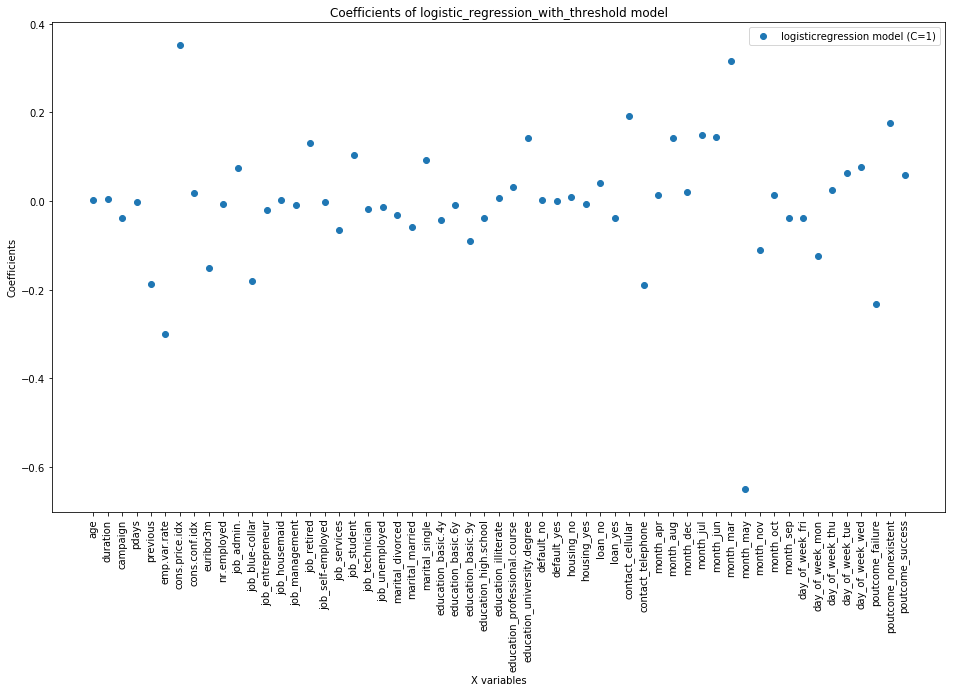

In [22]:
plt.figure(figsize=(16,9))

plt.plot(model.coef_.T, 'o', label="logisticregression model (C=1)")
plt.xticks(range(X.shape[1]), df.columns, rotation=90)
plt.title("Coefficients of logistic_regression_with_threshold model")
plt.ylabel("Coefficients")
plt.xlabel("X variables")
plt.legend()

In [23]:
np.exp(model.coef_)

array([[ 1.003,  1.004,  0.962,  0.998,  0.83 ,  0.742,  1.423,  1.017,
         0.86 ,  0.993,  1.077,  0.835,  0.98 ,  1.002,  0.99 ,  1.141,
         0.997,  0.937,  1.109,  0.981,  0.988,  0.969,  0.944,  1.097,
         0.959,  0.991,  0.913,  0.963,  1.007,  1.033,  1.153,  1.003,
         1.   ,  1.01 ,  0.993,  1.042,  0.963,  1.212,  0.828,  1.014,
         1.152,  1.022,  1.161,  1.155,  1.372,  0.522,  0.896,  1.014,
         0.963,  0.963,  0.883,  1.025,  1.066,  1.08 ,  0.793,  1.193,
         1.06 ]])

In [24]:
# Before we can interpret coefficients as probabilities, we need to do a little math to calculate the odds ratio
# and the probability
logodds = model.intercept_ + model.coef_[0] * 2
odds = np.exp(logodds)
probabilities = odds/(1 + odds)
probabilities

array([ 0.502,  0.503,  0.481,  0.5  ,  0.408,  0.356,  0.67 ,  0.509,
        0.426,  0.497,  0.538,  0.412,  0.491,  0.502,  0.496,  0.566,
        0.499,  0.468,  0.552,  0.491,  0.495,  0.485,  0.472,  0.547,
        0.48 ,  0.496,  0.456,  0.482,  0.504,  0.517,  0.571,  0.502,
        0.501,  0.506,  0.497,  0.521,  0.482,  0.596,  0.407,  0.508,
        0.571,  0.512,  0.575,  0.572,  0.654,  0.215,  0.446,  0.508,
        0.482,  0.482,  0.439,  0.513,  0.532,  0.539,  0.387,  0.588,
        0.53 ])

In [25]:
number_of_x_vars = len(df.columns) - 1

/Users/davidtan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


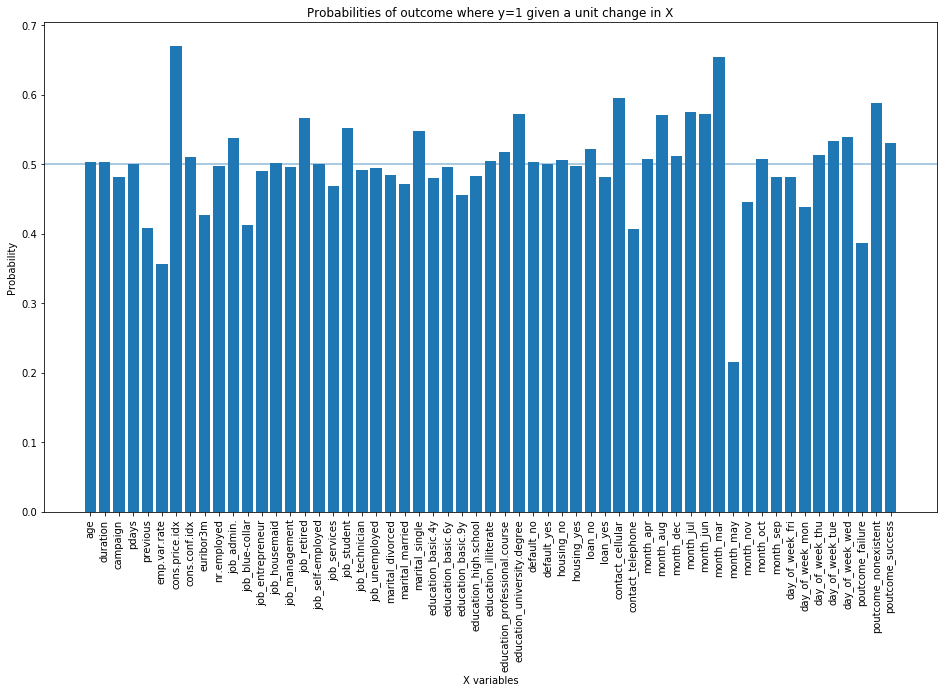

In [26]:
plt.figure(figsize=(16,9))

plt.bar(range(0, number_of_x_vars), probabilities)
plt.title("Probabilities of outcome where y=1 given a unit change in X")
plt.xlabel("X variables")
plt.ylabel("Probability")
plt.axhline(y=0.5, hold=None, alpha=0.5)
plt.xticks(range(X.shape[1]), df.columns, rotation=90)
plt.legend()

#### How to interpret the chart 

We can interpret the chart above as such: Given a unit increase in X, the user is predicted to be \__% more likely to purchase a bank term deposit (i.e. y=1)

For example, given a unit increase in employment variation rate (the first positive blip in the chart), the user is predicted to be 16% more likely to purchase a bank term deposit